In [1]:
%matplotlib inline
import xarray as xr
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
get_ipython().run_line_magic('pylab', 'inline')
#sns.set_style("darkgrid")
pylab.rcParams['figure.figsize'] = (16, 8)
pylab.rcParams.update({'font.size': 10})

Populating the interactive namespace from numpy and matplotlib


In [3]:
df = xr.open_dataset("experiments_results_20190301-020136.h5")
df

<xarray.Dataset>
Dimensions:                  (angle: 3, iteration: 30, layer: 5, n_iters: 1, n_layers: 3, n_shots: 1, plusminus: 2, qubit: 8, run: 10)
Coordinates:
  * angle                    (angle) object 'theta' 'phi' 'lambda'
  * iteration                (iteration) int64 0 1 2 3 4 5 ... 24 25 26 27 28 29
  * layer                    (layer) int64 0 1 2 3 4
  * n_iters                  (n_iters) int64 30
  * n_layers                 (n_layers) int64 3 4 5
  * n_shots                  (n_shots) int64 100
  * plusminus                (plusminus) int64 0 1
  * qubit                    (qubit) int64 0 1 2 3 4 5 6 7
  * run                      (run) int64 0 1 2 3 4 5 6 7 8 9
Data variables:
    fidelity                 (n_iters, n_layers, n_shots, run, iteration, plusminus) float64 ...
    last_theta               (n_iters, n_layers, n_shots, run, layer, qubit, angle) float64 ...
    uncompiled_model_depth   (n_iters, n_layers, n_shots, run) int64 ...
    uncompiled_target_depth  (n_

Text(0.5, 1.0, 'Fidelity improvement with optimiser iterations')

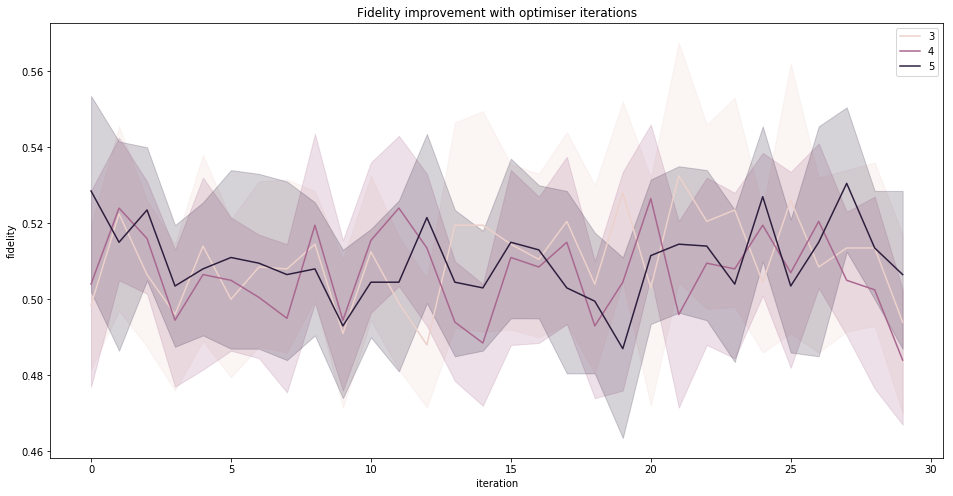

In [6]:
sns.lineplot(x='iteration', y='fidelity', hue='n_layers', data=df.fidelity.to_dataframe().reset_index())
plt.legend(df.n_layers.values)
plt.title("Fidelity improvement with optimiser iterations")

In [13]:
df.fidelity.max(dim="iteration").mean(dim='run')#.mean(dim='n_layers')

<xarray.DataArray 'fidelity' (n_iters: 1, n_layers: 3, n_shots: 1, plusminus: 2)>
array([[[[0.616, 0.618]],

        [[0.612, 0.607]],

        [[0.623, 0.601]]]])
Coordinates:
  * n_iters    (n_iters) int64 30
  * n_layers   (n_layers) int64 3 4 5
  * n_shots    (n_shots) int64 100
  * plusminus  (plusminus) int64 0 1